In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Vrinda Store Data Analysis.xlsx')

In [3]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

In [4]:
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Gender            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Date              31047 non-null  datetime64[ns]
 6   Status            31047 non-null  object        
 7   Channel           31047 non-null  object        
 8   SKU               31047 non-null  object        
 9   Category          31047 non-null  object        
 10  Size              31047 non-null  object        
 11  Qty               31047 non-null  object        
 12  currency          31047 non-null  object        
 13  Amount            31047 non-null  int64         
 14  ship-city         3104

## Preprocessing

In [6]:
df['index'] = df['index'].astype('str')
df['Cust ID'] = df['Cust ID'].astype('str')
df['ship-postal-code'] = df['ship-postal-code'].astype('str')

In [7]:
df.describe()

,Age,Amount
count,31047.000000,31047.000000
mean,39.496570,682.074822
std,15.117233,268.582173
min,18.000000,229.000000
25%,28.000000,486.000000
50%,37.000000,646.000000
75%,47.000000,794.000000
max,78.000000,3036.000000


In [8]:
df.isna().sum()

index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


### Gender Column

In [11]:
df['Gender'].value_counts()

Women    21479
Men       9452
W           74
M           42
Name: Gender, dtype: int64

In [12]:
df['Gender'] = np.where(df['Gender']=='W','Women',np.where(df['Gender']=='M','Men',df['Gender']))

In [13]:
df['Gender'].value_counts()

Women    21553
Men       9494
Name: Gender, dtype: int64

In [14]:
21479+74

21553

In [15]:
9452+42

9494


### Age Column

<AxesSubplot:ylabel='Age'>

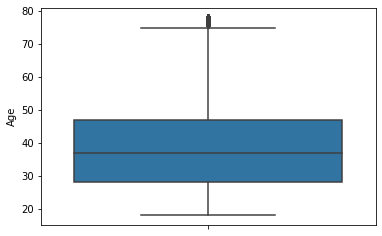

In [16]:
sns.boxplot(y=df['Age'])

<AxesSubplot:ylabel='Age'>

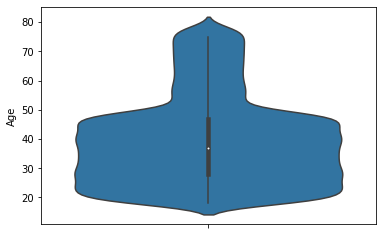

In [17]:
sns.violinplot(y=df['Age'])

### Date Column

In [18]:
df.head(2)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False


In [19]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [20]:
df.head(2)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Year,Month
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,...,1,INR,376,MOHALI,PUNJAB,140301,IN,False,2022,12
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,...,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,2022,12


In [21]:
df['Year'].value_counts()

2022    31047
Name: Year, dtype: int64

In [22]:
df['Month'].value_counts(sort=False)

1     2702
2     2750
3     2819
4     2685
5     2617
6     2597
7     2579
8     2617
9     2490
10    2424
11    2383
12    2384
Name: Month, dtype: int64

## Status Column

In [23]:
df['Status'].value_counts()

Delivered    28641
Returned      1045
Cancelled      844
Refunded       517
Name: Status, dtype: int64

## Channel Colum

In [24]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month'],
      dtype='object')

<hr>
<h4> There is space in Channel column name. <br> <br>
Will remove that first <h4>
    <hr>

In [25]:
df.columns = df.columns.str.strip()

In [26]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month'],
      dtype='object')

In [27]:
df['Channel'].value_counts()

Amazon      11016
Myntra       7254
Flipkart     6703
Ajio         1931
Nalli        1484
Meesho       1398
Others       1261
Name: Channel, dtype: int64

## Category Column

In [28]:
df['Category'].value_counts()

Set              12391
kurta            10446
Western Dress     4066
Top               2193
Saree             1380
Ethnic Dress       264
Blouse             229
Bottom              78
Name: Category, dtype: int64

## Size Column

In [29]:
df['Size'].value_counts()

M       5485
L       5144
XL      4437
S       4176
XXL     4065
3XL     3347
XS      2503
Free    1408
6XL      208
5XL      161
4XL      113
Name: Size, dtype: int64

## Qty Column

In [30]:
df['Qty'].value_counts()

1      30878
2        114
3         19
Two       16
One       13
4          6
5          1
Name: Qty, dtype: int64

In [31]:
df2 = df.copy()

In [32]:
df2['Qty'] = np.where(df2['Qty']=='Two',2,
                     np.where(df2['Qty']=='One',1,
                             df2['Qty']))

In [33]:
df2['Qty'].value_counts()

1    30891
2      130
3       19
4        6
5        1
Name: Qty, dtype: int64

In [34]:
df = df2.copy()

In [35]:
del df2

In [36]:
df['Qty'].value_counts()

1    30891
2      130
3       19
4        6
5        1
Name: Qty, dtype: int64

In [37]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month'],
      dtype='object')

## currency Column

In [38]:
df['currency'].value_counts()

INR    31047
Name: currency, dtype: int64

## Amount Column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

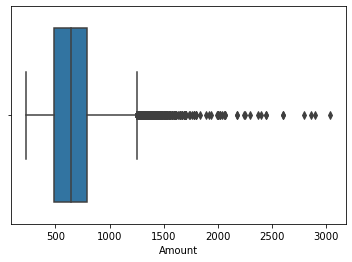

In [39]:
sns.boxplot(df['Amount'])

In [40]:
len(df)

31047

In [41]:
len(df.loc[df['Amount']>1200])

1423

In [42]:
df.loc[df['Amount']==df['Amount'].max()]

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Year,Month
3738,3739,405-3531176-2420307,3531176,Men,29,2022-08-04,Delivered,Amazon,SET197-KR-NP-M,Set,...,4,INR,3036,LUCKNOW,UTTAR PRADESH,226002,IN,False,2022,8


## ship-city Column

In [43]:
df['ship-city'].value_counts()

BENGALURU    2540
HYDERABAD    1785
NEW DELHI    1560
CHENNAI      1272
MUMBAI       1224
             ... 
Bamor           1
IDUKKI          1
calicut         1
KAMAND          1
Kullu           1
Name: ship-city, Length: 2603, dtype: int64

In [44]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month'],
      dtype='object')

## ship-state Column

In [45]:
len(df['ship-state'].value_counts())

50

In [46]:
df['ship-state'].value_counts()

MAHARASHTRA           4519
KARNATAKA             3988
UTTAR PRADESH         2882
TAMIL NADU            2679
TELANGANA             2527
DELHI                 1804
KERALA                1549
WEST BENGAL           1425
ANDHRA PRADESH        1369
HARYANA               1118
GUJARAT               1058
MADHYA PRADESH         767
RAJASTHAN              753
BIHAR                  572
ODISHA                 571
PUNJAB                 497
ASSAM                  479
UTTARAKHAND            453
JHARKHAND              356
GOA                    299
CHHATTISGARH           246
JAMMU & KASHMIR        214
HIMACHAL PRADESH       197
MANIPUR                100
CHANDIGARH              89
PUDUCHERRY              78
ANDAMAN & NICOBAR       72
SIKKIM                  71
NAGALAND                50
TRIPURA                 47
ARUNACHAL PRADESH       45
MEGHALAYA               40
Delhi                   26
DADRA AND NAGAR         21
MIZORAM                 20
LADAKH                  16
New Delhi               10
B

In [47]:
df['ship-state'].value_counts().duplicated()

MAHARASHTRA           False
KARNATAKA             False
UTTAR PRADESH         False
TAMIL NADU            False
TELANGANA             False
DELHI                 False
KERALA                False
WEST BENGAL           False
ANDHRA PRADESH        False
HARYANA               False
GUJARAT               False
MADHYA PRADESH        False
RAJASTHAN             False
BIHAR                 False
ODISHA                False
PUNJAB                False
ASSAM                 False
UTTARAKHAND           False
JHARKHAND             False
GOA                   False
CHHATTISGARH          False
JAMMU & KASHMIR       False
HIMACHAL PRADESH      False
MANIPUR               False
CHANDIGARH            False
PUDUCHERRY            False
ANDAMAN & NICOBAR     False
SIKKIM                False
NAGALAND              False
TRIPURA               False
ARUNACHAL PRADESH     False
MEGHALAYA             False
Delhi                 False
DADRA AND NAGAR       False
MIZORAM               False
LADAKH              

In [48]:
print(df['ship-state'].value_counts().index)

Index(['MAHARASHTRA', 'KARNATAKA', 'UTTAR PRADESH', 'TAMIL NADU', 'TELANGANA',
       'DELHI', 'KERALA', 'WEST BENGAL', 'ANDHRA PRADESH', 'HARYANA',
       'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'BIHAR', 'ODISHA', 'PUNJAB',
       'ASSAM', 'UTTARAKHAND', 'JHARKHAND', 'GOA', 'CHHATTISGARH',
       'JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'MANIPUR', 'CHANDIGARH',
       'PUDUCHERRY', 'ANDAMAN & NICOBAR ', 'SIKKIM', 'NAGALAND', 'TRIPURA',
       'ARUNACHAL PRADESH', 'MEGHALAYA', 'Delhi', 'DADRA AND NAGAR', 'MIZORAM',
       'LADAKH', 'New Delhi', 'Bihar', 'Punjab', 'Goa', 'delhi', 'Chandigarh',
       'goa', 'punjab', 'Arunachal pradesh', 'Arunachal Pradesh', 'Manipur',
       'bihar', 'Sikkim', 'Nagaland'],
      dtype='object')


In [49]:
df['ship-state'].value_counts().duplicated()

MAHARASHTRA           False
KARNATAKA             False
UTTAR PRADESH         False
TAMIL NADU            False
TELANGANA             False
DELHI                 False
KERALA                False
WEST BENGAL           False
ANDHRA PRADESH        False
HARYANA               False
GUJARAT               False
MADHYA PRADESH        False
RAJASTHAN             False
BIHAR                 False
ODISHA                False
PUNJAB                False
ASSAM                 False
UTTARAKHAND           False
JHARKHAND             False
GOA                   False
CHHATTISGARH          False
JAMMU & KASHMIR       False
HIMACHAL PRADESH      False
MANIPUR               False
CHANDIGARH            False
PUDUCHERRY            False
ANDAMAN & NICOBAR     False
SIKKIM                False
NAGALAND              False
TRIPURA               False
ARUNACHAL PRADESH     False
MEGHALAYA             False
Delhi                 False
DADRA AND NAGAR       False
MIZORAM               False
LADAKH              

<hr>
<h4> In india there are 28 states and 8 union territories so total should be 36 <br> <br>
    But here we get total 50 which is incorrect
Will correct that first <h4>
    <hr>

In [50]:
df['ship-state'] = df['ship-state'].str.upper() 

In [51]:
print("Total States = ",len(df['ship-state'].value_counts()))
df['ship-state'].value_counts()

Total States =  36


MAHARASHTRA           4519
KARNATAKA             3988
UTTAR PRADESH         2882
TAMIL NADU            2679
TELANGANA             2527
DELHI                 1833
KERALA                1549
WEST BENGAL           1425
ANDHRA PRADESH        1369
HARYANA               1118
GUJARAT               1058
MADHYA PRADESH         767
RAJASTHAN              753
BIHAR                  581
ODISHA                 571
PUNJAB                 508
ASSAM                  479
UTTARAKHAND            453
JHARKHAND              356
GOA                    306
CHHATTISGARH           246
JAMMU & KASHMIR        214
HIMACHAL PRADESH       197
MANIPUR                101
CHANDIGARH              92
PUDUCHERRY              78
SIKKIM                  72
ANDAMAN & NICOBAR       72
NAGALAND                51
ARUNACHAL PRADESH       49
TRIPURA                 47
MEGHALAYA               40
DADRA AND NAGAR         21
MIZORAM                 20
LADAKH                  16
NEW DELHI               10
Name: ship-state, dtype: int

<h4> Now the value count is 36 which is correct 28 states + 8 UT <h4>

## ship-postal-code Column

In [52]:
df['ship-postal-code'].value_counts()

201301    230
122001    179
560037    172
248001    130
560068    122
         ... 
148023      1
445307      1
581332      1
209863      1
534239      1
Name: ship-postal-code, Length: 4958, dtype: int64

In [53]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month'],
      dtype='object')

## ship-country Column

In [54]:
df['ship-country'].value_counts()

IN    31047
Name: ship-country, dtype: int64

## B2B Column

In [55]:
df['B2B'].value_counts()

False    30861
True       186
Name: B2B, dtype: int64

## Year & Month columns are created by me for my study.
## So need to preprocess again

In [56]:
df.nunique()

index               31047
Order ID            28471
Cust ID             28437
Gender                  2
Age                    61
Date                   36
Status                  4
Channel                 7
SKU                  5287
Category                8
Size                   11
Qty                     5
currency                1
Amount                769
ship-city            2603
ship-state             36
ship-postal-code     4958
ship-country            1
B2B                     2
Year                    1
Month                  12
dtype: int64

## Extra Preprocessing 

## Adding Age Group Column To Category Ages

In [57]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month'],
      dtype='object')

In [58]:
bins = [0, 12, 19, 35, 50, 65, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']

In [59]:
df['Age-Group'] = pd.cut(df['Age'],bins=bins,labels=labels, right=False)

In [60]:
df.loc[:,('Age','Age-Group')].head()

,Age,Age-Group
0,44,Adult
1,29,Young Adult
2,67,Senior
3,20,Young Adult
4,62,Middle Age


In [61]:
print(df.columns)

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month', 'Age-Group'],
      dtype='object')


## Expolaratory Data Analysis

In [62]:
len(df)

31047

In [63]:
xv = df['Gender'].value_counts().index
yv = df['Gender'].value_counts().values

<BarContainer object of 2 artists>

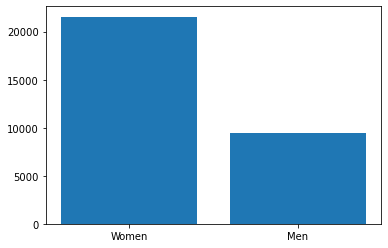

In [64]:
plt.bar(xv,yv)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


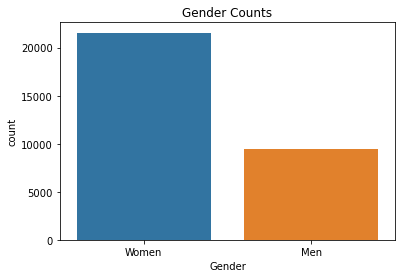

In [65]:
plt.title('Gender Counts')
sns.countplot(df['Gender'])
plt.show()

<AxesSubplot:xlabel='Age-Group', ylabel='count'>

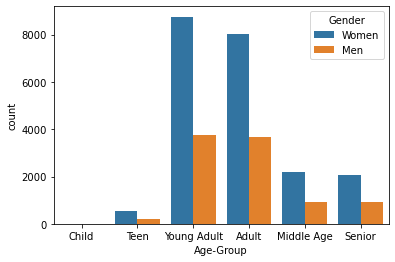

In [66]:
sns.countplot(data=df,x='Age-Group', hue='Gender')

In [67]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month', 'Age-Group'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='count'>

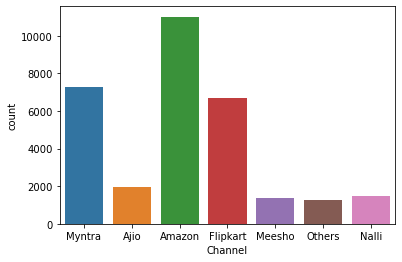

In [68]:
sns.countplot(df['Channel'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


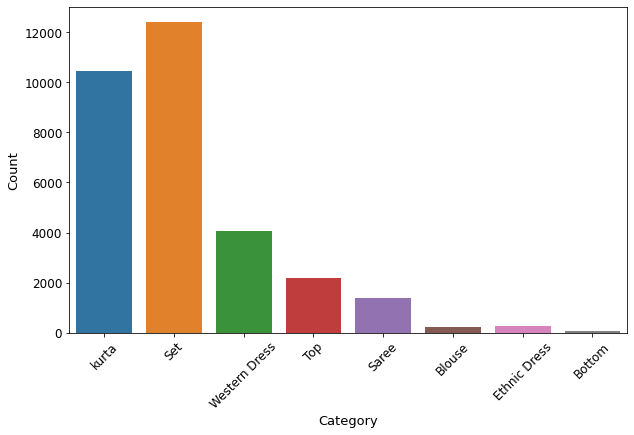

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(df['Category'])
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Category',fontsize=13)
plt.show()

Text(0, 0.5, 'Counts')

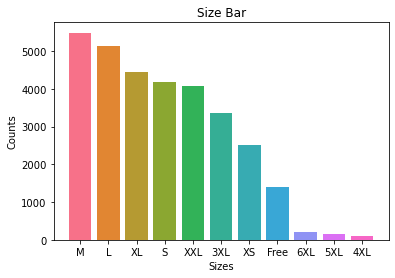

In [70]:
xv = df['Size'].value_counts().index
yv = df['Size'].value_counts().values


colors = sns.color_palette('husl',len(xv))
plt.bar(x=xv,height=yv,color=colors)

plt.title('Size Bar')
plt.xlabel('Sizes')
plt.ylabel('Counts')

In [71]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month', 'Age-Group'],
      dtype='object')

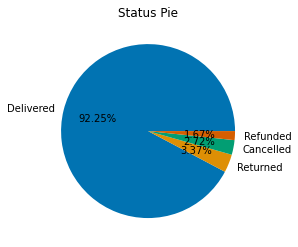

In [72]:
xv = df['Status'].value_counts().index
yv = df['Status'].value_counts().values


colors = sns.color_palette('colorblind',len(xv))
plt.pie(x=yv,labels=xv,colors=colors,autopct='%.2f%%')
plt.title('Status Pie')
plt.show()

No handles with labels found to put in legend.


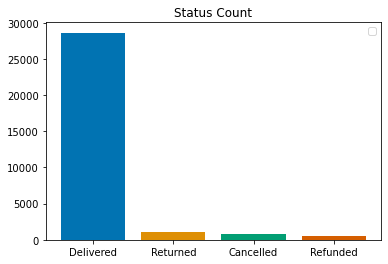

Delivered  =  92.25  %
Returned  =  3.37  %
Cancelled  =  2.72  %
Refunded  =  1.67  %


In [73]:
xv = df['Status'].value_counts().index
yv = df['Status'].value_counts().values


colors = sns.color_palette('colorblind',len(xv))
plt.bar(x=xv,height=yv,color=colors,)
plt.title('Status Count')
plt.legend()
plt.show()

vc = df['Status'].value_counts(normalize=True,ascending=False)*100

for i,v in zip(vc.index,vc.values):
    print(i ,' = ',round(v,2),' %')

In [74]:
xv = df['Month'].value_counts(sort=False).index
yv = df['Month'].value_counts(sort=False).values
df['Month'].value_counts(sort=False)

1     2702
2     2750
3     2819
4     2685
5     2617
6     2597
7     2579
8     2617
9     2490
10    2424
11    2383
12    2384
Name: Month, dtype: int64

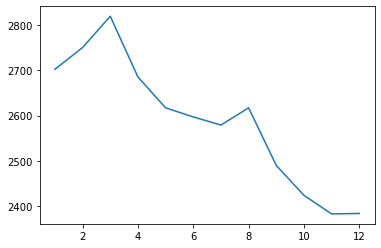

In [75]:
plt.plot(xv,yv)

In [76]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month', 'Age-Group'],
      dtype='object')

In [77]:
df.groupby(by='Category').mean()

,Age,Amount,B2B,Year,Month
Category,,,,,
Blouse,38.510917,615.231441,0.008734,2022.0,6.759825
Bottom,39.205128,356.461538,0.000000,2022.0,6.807692
Ethnic Dress,40.469697,739.606061,0.011364,2022.0,6.659091
Saree,40.278261,732.225362,0.002899,2022.0,6.982609
Set,39.573642,847.998225,0.005488,2022.0,6.197159
Top,39.351117,540.902417,0.006384,2022.0,6.499772
Western Dress,39.348008,774.430890,0.006640,2022.0,6.604525
kurta,39.389431,474.763259,0.006510,2022.0,6.237411


In [78]:
df.groupby(by='Category').mean()['Amount']

Category
Blouse           615.231441
Bottom           356.461538
Ethnic Dress     739.606061
Saree            732.225362
Set              847.998225
Top              540.902417
Western Dress    774.430890
kurta            474.763259
Name: Amount, dtype: float64

In [79]:
df_grp = df.groupby(by=['Category','Gender']).sum()['Amount']
df_grp

Category       Gender
Blouse         Men          5331
               Women      135557
Bottom         Men         16312
               Women       11492
Ethnic Dress   Men        132073
               Women       63183
Saree          Men        217293
               Women      793178
Set            Men       4333954
               Women     6173592
Top            Men         27650
               Women     1158549
Western Dress  Men       2797391
               Women      351445
kurta          Men         83600
               Women     4875777
Name: Amount, dtype: int64

In [80]:
df_grp.index = [i+' '+j for i,j in df_grp.index]

In [81]:
df_grp

Blouse Men                5331
Blouse Women            135557
Bottom Men               16312
Bottom Women             11492
Ethnic Dress Men        132073
Ethnic Dress Women       63183
Saree Men               217293
Saree Women             793178
Set Men                4333954
Set Women              6173592
Top Men                  27650
Top Women              1158549
Western Dress Men      2797391
Western Dress Women     351445
kurta Men                83600
kurta Women            4875777
Name: Amount, dtype: int64

In [82]:
df_grp.sort_values(ascending=False)

Set Women              6173592
kurta Women            4875777
Set Men                4333954
Western Dress Men      2797391
Top Women              1158549
Saree Women             793178
Western Dress Women     351445
Saree Men               217293
Blouse Women            135557
Ethnic Dress Men        132073
kurta Men                83600
Ethnic Dress Women       63183
Top Men                  27650
Bottom Men               16312
Bottom Women             11492
Blouse Men                5331
Name: Amount, dtype: int64

In [83]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month', 'Age-Group'],
      dtype='object')

In [84]:
df.groupby(by=['Channel','Age-Group']).sum()['Amount']

Channel   Age-Group  
Ajio      Child                NaN
          Teen             32183.0
          Young Adult     553104.0
          Adult           492540.0
          Middle Age      118942.0
          Senior          134658.0
Amazon    Child                NaN
          Teen            181501.0
          Young Adult    3023305.0
          Adult          2835562.0
          Middle Age      738463.0
          Senior          741102.0
Flipkart  Child                NaN
          Teen             98836.0
          Young Adult    1813786.0
          Adult          1738058.0
          Middle Age      498223.0
          Senior          424398.0
Meesho    Child                NaN
          Teen             21184.0
          Young Adult     389260.0
          Adult           333219.0
          Middle Age       79853.0
          Senior          104090.0
Myntra    Child                NaN
          Teen            126607.0
          Young Adult    2014113.0
          Adult          1861007.

In [85]:
df['ship-state'].value_counts()

MAHARASHTRA           4519
KARNATAKA             3988
UTTAR PRADESH         2882
TAMIL NADU            2679
TELANGANA             2527
DELHI                 1833
KERALA                1549
WEST BENGAL           1425
ANDHRA PRADESH        1369
HARYANA               1118
GUJARAT               1058
MADHYA PRADESH         767
RAJASTHAN              753
BIHAR                  581
ODISHA                 571
PUNJAB                 508
ASSAM                  479
UTTARAKHAND            453
JHARKHAND              356
GOA                    306
CHHATTISGARH           246
JAMMU & KASHMIR        214
HIMACHAL PRADESH       197
MANIPUR                101
CHANDIGARH              92
PUDUCHERRY              78
SIKKIM                  72
ANDAMAN & NICOBAR       72
NAGALAND                51
ARUNACHAL PRADESH       49
TRIPURA                 47
MEGHALAYA               40
DADRA AND NAGAR         21
MIZORAM                 20
LADAKH                  16
NEW DELHI               10
Name: ship-state, dtype: int

In [86]:
state_amt = df.groupby(by=['ship-state']).sum()['Amount'].sort_values(ascending=False)
state_amt

ship-state
MAHARASHTRA           2990221
KARNATAKA             2646358
UTTAR PRADESH         2104659
TELANGANA             1712439
TAMIL NADU            1678877
DELHI                 1266328
KERALA                1008940
WEST BENGAL            922444
ANDHRA PRADESH         918499
HARYANA                813320
GUJARAT                715563
MADHYA PRADESH         564026
RAJASTHAN              547360
BIHAR                  446831
ODISHA                 414840
PUNJAB                 368940
UTTARAKHAND            327179
ASSAM                  326423
JHARKHAND              255054
GOA                    184169
CHHATTISGARH           174531
JAMMU & KASHMIR        158736
HIMACHAL PRADESH       146246
MANIPUR                 78865
CHANDIGARH              63059
SIKKIM                  54916
ANDAMAN & NICOBAR       51970
PUDUCHERRY              48553
NAGALAND                43510
ARUNACHAL PRADESH       36840
TRIPURA                 30961
MEGHALAYA               25988
DADRA AND NAGAR         14980

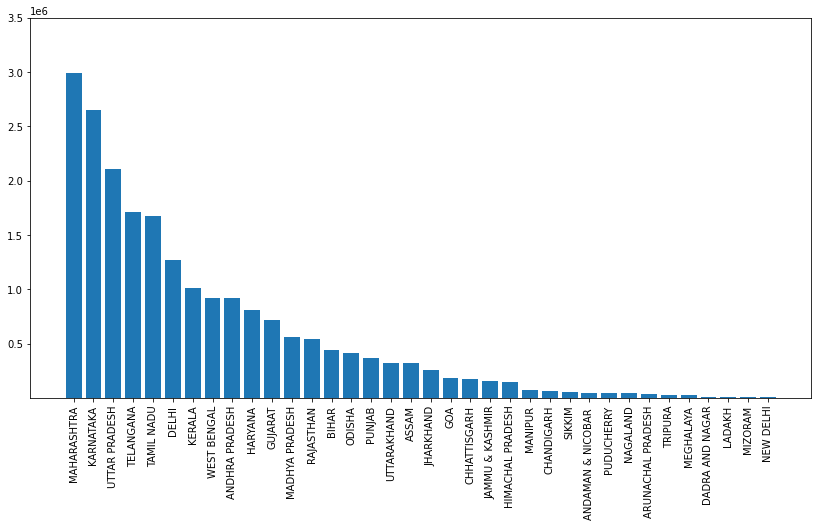

In [87]:
plt.figure(figsize=(14,7))
plt.bar(x=state_amt.index,height=state_amt.values)
plt.xticks(rotation=90)
plt.ylim(1000,3500000)
plt.show()

In [88]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Year', 'Month', 'Age-Group'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age-Group', ylabel='count'>

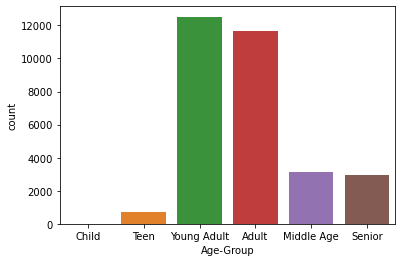

In [91]:
sns.countplot(df['Age-Group'].sort_values())

In [102]:
df.groupby(df['Age-Group'])['Amount'].sum().sort_values(ascending=False)

Age-Group
Young Adult    8537817
Adult          7984948
Middle Age     2130199
Senior         2024563
Teen            498850
Child                0
Name: Amount, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='count'>

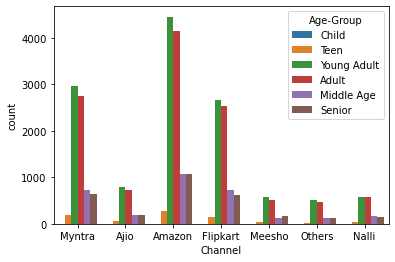

In [99]:
sns.countplot(df['Channel'],hue=df['Age-Group'])

In [107]:
stamt = df.groupby(by=['ship-state','Age-Group'])['Amount'].sum()

In [113]:
stamt

ship-state          Age-Group  
ANDAMAN & NICOBAR   Child               NaN
                    Teen             2246.0
                    Young Adult     18638.0
                    Adult           18095.0
                    Middle Age       4309.0
                                     ...   
WEST BENGAL         Teen            27513.0
                    Young Adult    367861.0
                    Adult          342700.0
                    Middle Age      93276.0
                    Senior          91094.0
Name: Amount, Length: 216, dtype: float64

In [114]:
len(stamt.index)

216

In [115]:
len(stamt.values)

216

In [118]:
type(stamt.values)

numpy.ndarray

In [131]:
stamt.values.max()

nan


<p> `NaN` values in an array can cause the `max` function to return `NaN`.
To handle this, you can use `np.nanmax`, clean your data, or use masked arrays to ignore `NaN` values. 
Choose the method that best fits your use case.
<p> 

In [130]:
np.nanmax(stamt.values)

1211640.0

In [133]:
for ind,val in zip(stamt.index,stamt.values):
    if val == np.nanmax(stamt.values):
        print(i, ' = ',j)

('WEST BENGAL', 'Senior')  =  91094.0


In [138]:
grouped_data = df.groupby(by=['Age-Group','ship-state'])['Amount'].sum().reset_index()

In [139]:
grouped_data

,Age-Group,ship-state,Amount
0,Child,ANDAMAN & NICOBAR,NaN
1,Child,ANDHRA PRADESH,NaN
2,Child,ARUNACHAL PRADESH,NaN
3,Child,ASSAM,NaN
4,Child,BIHAR,NaN
...,...,...,...
211,Senior,TELANGANA,173770.0
212,Senior,TRIPURA,4457.0
213,Senior,UTTAR PRADESH,177269.0
214,Senior,UTTARAKHAND,32968.0


In [141]:
pivot_table = grouped_data.pivot(index='Age-Group',columns='ship-state',values='Amount')

In [142]:
pivot_table

ship-state,ANDAMAN & NICOBAR,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,DADRA AND NAGAR,DELHI,GOA,...,PUDUCHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TELANGANA,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL
Age-Group,,,,,,,,,,,,,,,,,,,,,
Child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teen,2246.0,20412.0,NaN,8998.0,10731.0,2052.0,4880.0,NaN,32531.0,3825.0,...,NaN,5375.0,12412.0,801.0,33984.0,39118.0,518.0,51529.0,13123.0,27513.0
Young Adult,18638.0,364121.0,15812.0,125197.0,171160.0,24228.0,63388.0,4407.0,508022.0,79438.0,...,25468.0,157279.0,222025.0,15490.0,671613.0,702349.0,14165.0,872985.0,135116.0,367861.0
Adult,18095.0,363970.0,7974.0,139831.0,173436.0,26924.0,68056.0,6225.0,477404.0,72725.0,...,13349.0,134843.0,203951.0,26351.0,639265.0,622019.0,10352.0,792457.0,119630.0,342700.0
Middle Age,4309.0,92824.0,5785.0,30998.0,45361.0,5500.0,18354.0,1068.0,121284.0,14324.0,...,3938.0,34131.0,51872.0,9925.0,176704.0,175183.0,1469.0,210419.0,26342.0,93276.0
Senior,8682.0,77172.0,7269.0,21399.0,46143.0,4355.0,19853.0,3280.0,127087.0,13857.0,...,5798.0,37312.0,57100.0,2349.0,157311.0,173770.0,4457.0,177269.0,32968.0,91094.0


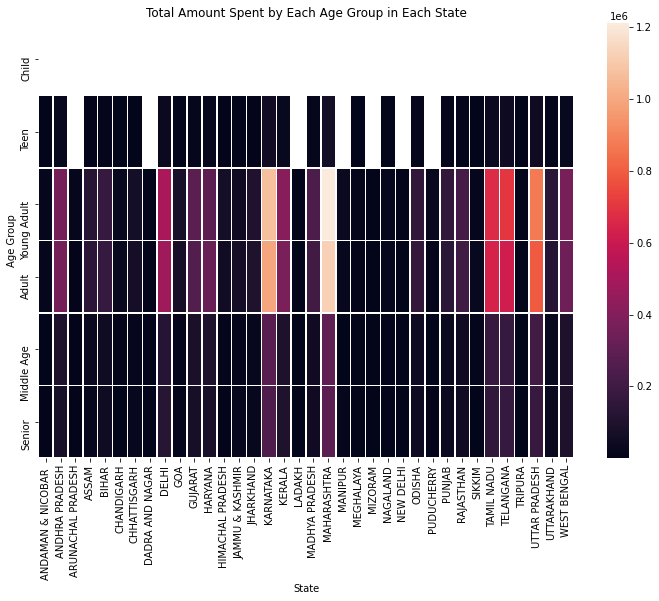

In [147]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table,annot=False, fmt=".1f", linewidths=.5)

plt.title('Total Amount Spent by Each Age Group in Each State')
plt.xlabel('State')
plt.ylabel('Age Group')

plt.show()